# Orthogonality

Mathematically, we know that a basis in $m$-dimensional space is any collection of $m$ independent vectors. In that sense, all bases are alike. But some bases behave a little more simply than others. 

For example, here are two nonsingular matrices. Each one has columns that form a basis of $\mathbb{R}^2$.

In [30]:
using LinearAlgebra, PyPlot
A = [ 1. 0; 0 1. ]

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [2]:
B = [1. 1.;0 1e-10 ]

2×2 Array{Float64,2}:
 1.0  1.0    
 0.0  1.0e-10

If we pick a vector on the unit circle and express it in the $A$-basis, nothing happens, as this is the standard basis. 

In [3]:
θ = π/5; x = [cos(θ),sin(θ)]

2-element Array{Float64,1}:
 0.8090169943749475
 0.5877852522924731

In [4]:
inv(A)*x

2-element Array{Float64,1}:
 0.8090169943749475
 0.5877852522924731

However, this same vector requires huge coefficients when expressed in the $B$-basis. 

In [5]:
inv(B)*x

2-element Array{Float64,1}:
 -5.877852522115714e9
  5.877852522924731e9

This should give us pause. If we turn around and multiply by $B$ in order to get back to the original coordinates, we will be relying on subtraction of two large numbers to give a result close to 1. This is the classic recipe for numerical cancellation errors in finite precision arithmetic.

In [6]:
B*ans

2-element Array{Float64,1}:
 0.8090171813964844
 0.5877852522924731

In [7]:
ans-x

2-element Array{Float64,1}:
 1.8702153692373713e-7
 0.0                  

In an everyday sense this difference is "small", but it is about a billion times larger than the native precision of 16 digits. We usually want to avoid this situation in computation.

## Lengths and angles

Using the Pythagorean theorem, we can compute the geometric "length" of a vector using the dot product of a vector with itself. (Note: In programming the "length" of a vector usually means the number of entries in the vector. We usually use *norm* for the geometric concept.)

In [8]:
x = [1.,8,-2,1];
x_dot_x = dot(x,x)

70.0

In [9]:
norm(x)^2

70.0

Dot products also allow us to define the angle between two vectors, generalizing the idea from vector calculus.

In [10]:
y = [-1.,0,4,4];
θ = acos( dot(x,y)/(norm(x)*norm(y)) )

1.675016190551446

## Orthogonal vectors and matrices

A pair of vectors is *orthgonal* if the angle between them is 90 degrees; i.e., their inner product is zero. An orthogonal pair $x,y$ has an important property: $\|x+y\|^2=\|x\|^2+\|y\|^2$.

In [11]:
x = [1.,-1,2,2];  y = [3.,3,-1,1];
@show dot(x,y)

dot(x, y) = 0.0


0.0

In [12]:
norm(x+y)^2 - (norm(x)^2 + norm(y)^2)

-7.105427357601002e-15

We say the vectors are *orthonormal* if they are orthogonal and both have 2-norm equal to 1. 

If a collection of vectors are all pairwise orthogonal, then the matrix of all their inner products is diagonal. 

In [13]:
q = [
    [1.,0.843793815631381,0.385082841103097,1.153941363055059,0.041831019534880],
    [1.279954581538459,1.,-3.713389640445241,-0.560099231434212,-1.134662608390795],
    [0.829958945764782,1.,-1.755401660923549,-1.159560882513616,8.134813986513553]
    ]

[ dot(q[i],q[j]) for i=1:3, j=1:3 ]

3×3 Array{Float64,2}:
  3.19361      -8.32667e-17   1.4988e-15 
 -8.32667e-17  18.0287        5.32907e-15
  1.4988e-15    5.32907e-15  72.29       

Recall that the product $AB$ is the collection of all inner products between rows of $A$ and columns of $B$. So we make these vectors columns of a matrix $Q$ and get

In [15]:
Q = hcat( (q[j] for j=1:3)... )
Q'*Q

3×3 Array{Float64,2}:
 3.19361       5.93045e-17   1.49658e-15
 5.93045e-17  18.0287        2.82447e-15
 1.49658e-15   2.82447e-15  72.29       

If moreover the columns are not just orthogonal but orthonormal, then $Q^TQ=I$.

We now bring things back to bases. An "ideal basis" is one that is orthonormal. If we collect such a basis into the matrix $Q$, then $Q$ is called an *orthogonal matrix*. In this case, $Q$ is square and $Q^TQ=I$, i.e., $Q^{-1}=Q^T$. 

## Geometry in $\mathbb{R}^2$ and orthogonal matrices

In two dimensions, the orthogonal matrices represent rotations,

In [38]:
rot(θ) = [ cos(θ) -sin(θ); sin(θ) cos(θ) ];
R=rot(2π/5)

2×2 Array{Float64,2}:
 0.309017  -0.951057
 0.951057   0.309017

and reflections,

In [39]:
refl(θ) = I - 2*[cos(θ),sin(θ)]*[cos(θ),sin(θ)]';
F=refl(2π/5)

2×2 Array{Float64,2}:
  0.809017  -0.587785
 -0.587785  -0.809017

In [26]:
R'*R-I

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

In [27]:
F'*F-I

2×2 Array{Float64,2}:
  0.0          -1.11022e-16
 -1.11022e-16   4.44089e-16

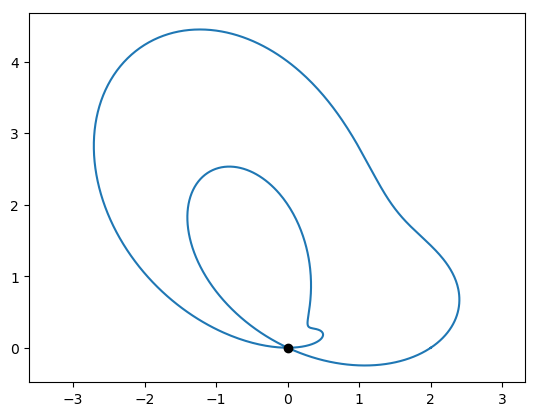

In [49]:
θ=range(0,stop=2π,length=800);
r=@. cos(3θ)+3sin(θ)+1;
x,y = @. r*cos(θ), r*sin(θ);
plot(x,y,"-");
plot(0,0,"ko");
axis("equal");

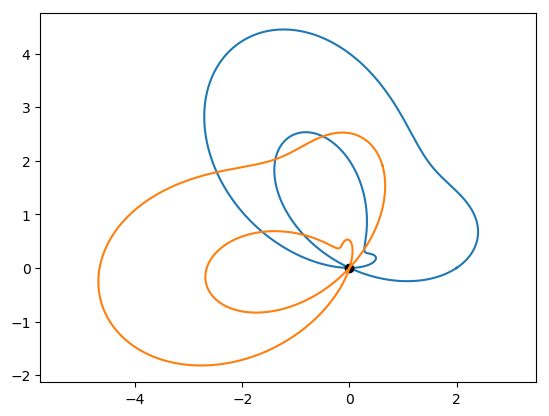

In [50]:
u=[x';y']; Ru=R*u; 

plot(x,y,"-");
plot(0,0,"ko");
plot(Ru[1,:],Ru[2,:],"-");
axis("equal");

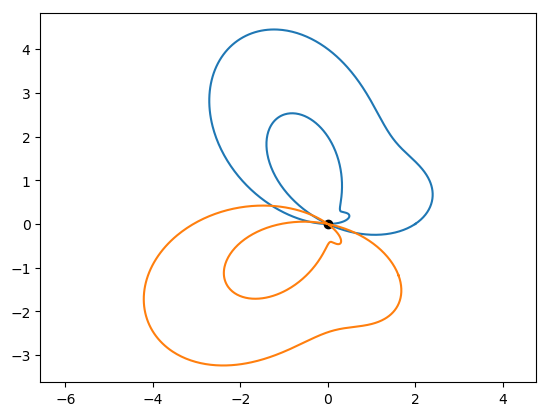

In [51]:
u=[x';y']; Fu=F*u; 

plot(x,y,"-");
plot(0,0,"ko");
plot(Fu[1,:],Fu[2,:],"-");
axis("equal");

## Complex values

For complex matrices we usually deal with the conjugate transpose, or *hermitian*, of the matrix, and use a \* superscript for it. We will be working with complex matrices a fair amount; often it's easiest to make statements for them and then specialize to real matrices by replacing \* with transpose. 

Note that the dot product includes complex conjugation on the first argument.

In [52]:
dot([1im],[1])

0 - 1im

In [53]:
dot([1],[1im])

0 + 1im

A complex square matrix $U$ for which $U^{-1}=U^*$ (i.e., columns are an orthonormal basis in $\mathbb{C}^m$) is called *unitary*.